In [2]:
# Visualization with Seaborn
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 

In [3]:
sns.set_theme() # seaborn method to set its chart style 

/tmp/ipykernel_482077/32103670.py:3: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  data = np.random.multivariate_normal([0,0],[[5,4],[12,0.5]], size=2000)


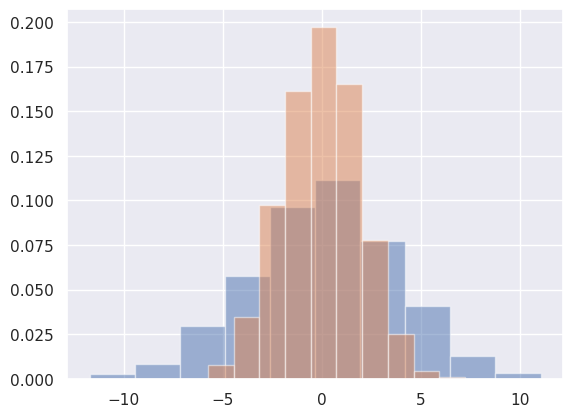

In [15]:
# Histograms, KDE, and Densities

data = np.random.multivariate_normal([0,0],[[5,4],[12,0.5]], size=2000)
data = pd.DataFrame(data, columns=["x","y"])

for col in "xy":
    plt.hist(data[col], density=True, alpha=0.5)

/tmp/ipykernel_482077/3449263925.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, shade=True)


<Axes: ylabel='Density'>

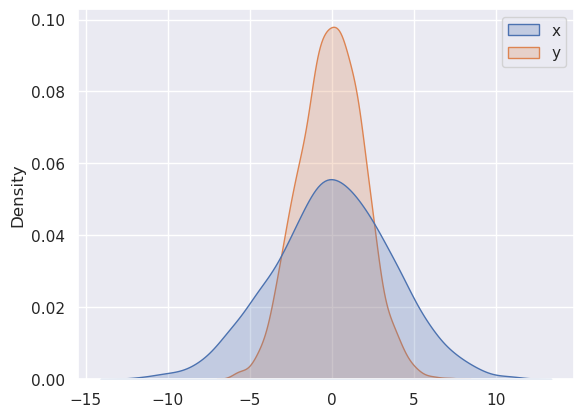

In [16]:
sns.kdeplot(data=data, shade=True)

<Axes: xlabel='x', ylabel='y'>

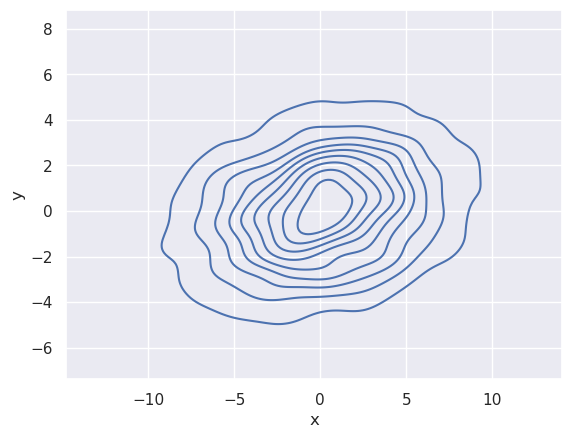

In [17]:
sns.kdeplot(data=data, x="x", y="y")

In [18]:
# Pair Plots 

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


/home/x057/anaconda31/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


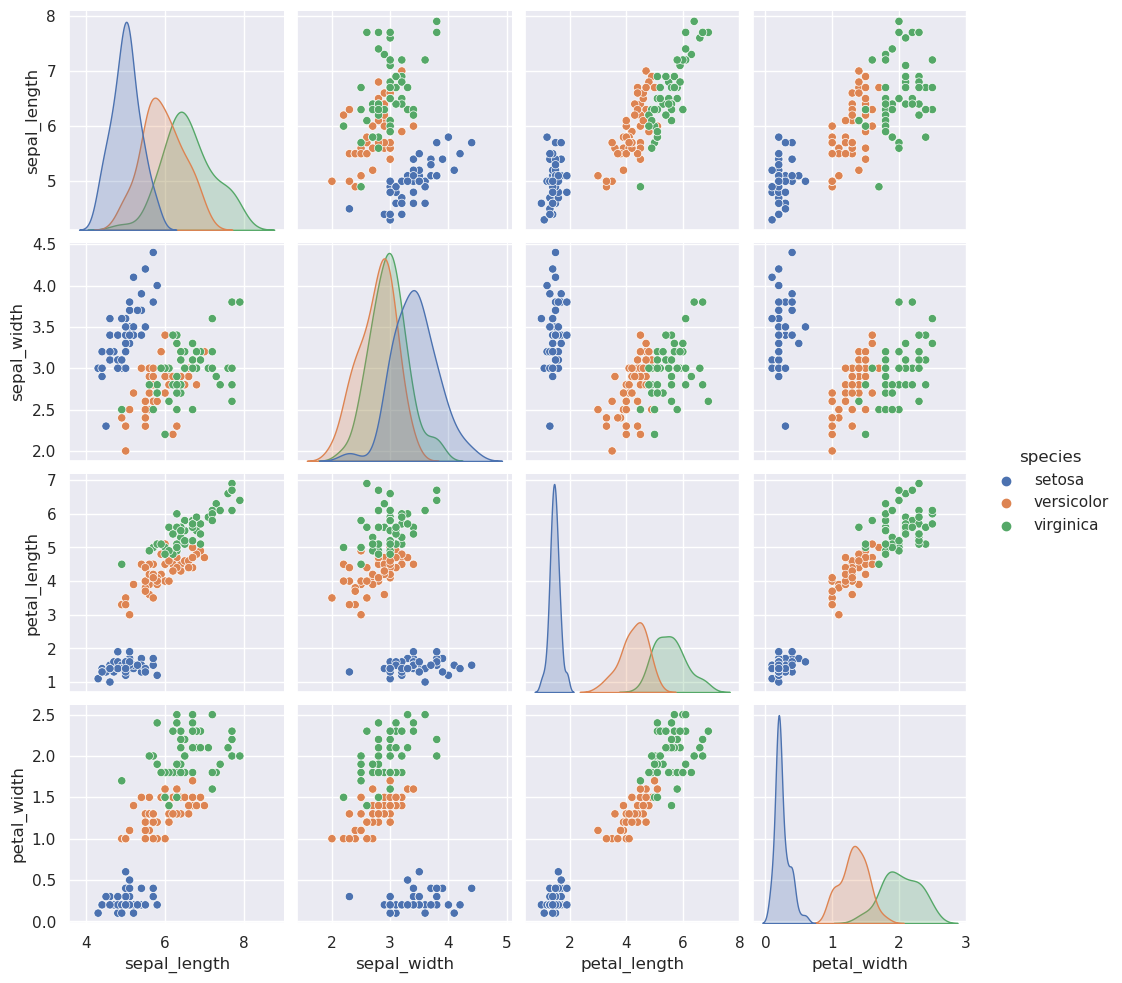

In [19]:
# одна из самых важных функций - показывающая 
# основные зависимости
sns.pairplot(iris, hue="species", height=2.5)

In [20]:
# Faceted Histogram 
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/home/x057/anaconda31/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


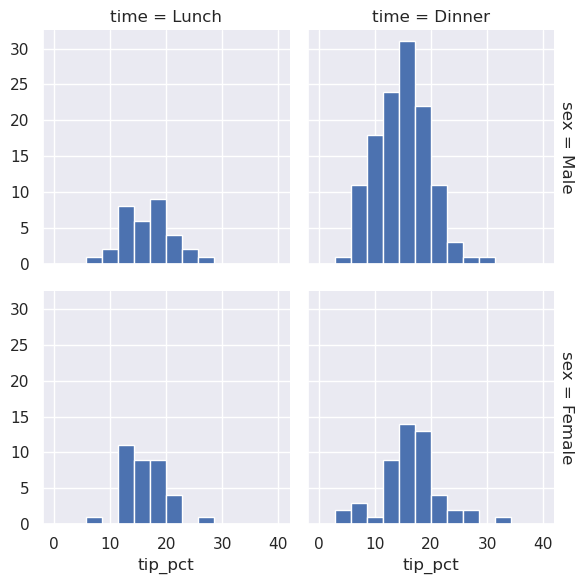

In [22]:
tips["tip_pct"] = 100 * tips["tip"] / tips["total_bill"]
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0,40,15));

/home/x057/anaconda31/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


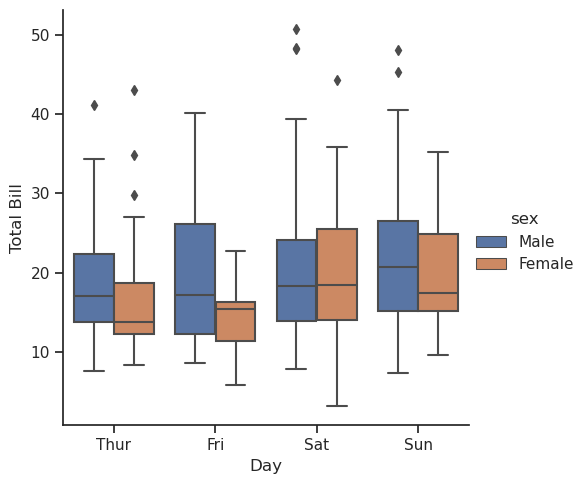

In [23]:
# Categorical Plots 
with sns.axes_style(style="ticks"):
    g = sns.catplot(x = "day", y = "total_bill", hue="sex", 
                    data = tips, kind = "box")
    g.set_axis_labels("Day", "Total Bill");

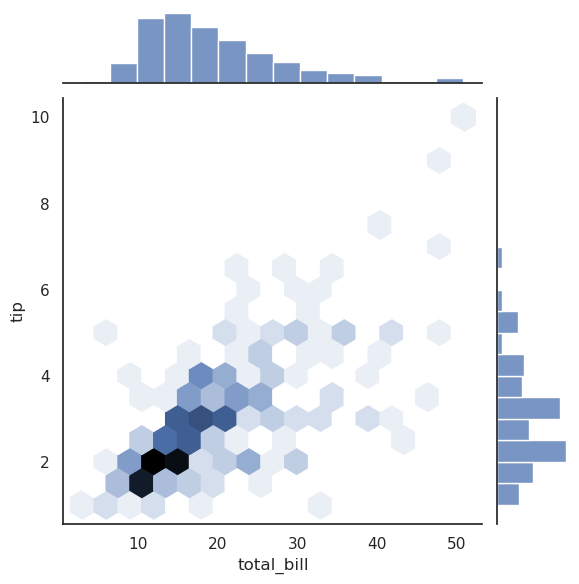

In [24]:
# Joint Distribution
with sns.axes_style("white"):
    sns.jointplot(x="total_bill", y="tip", data=tips, kind="hex")

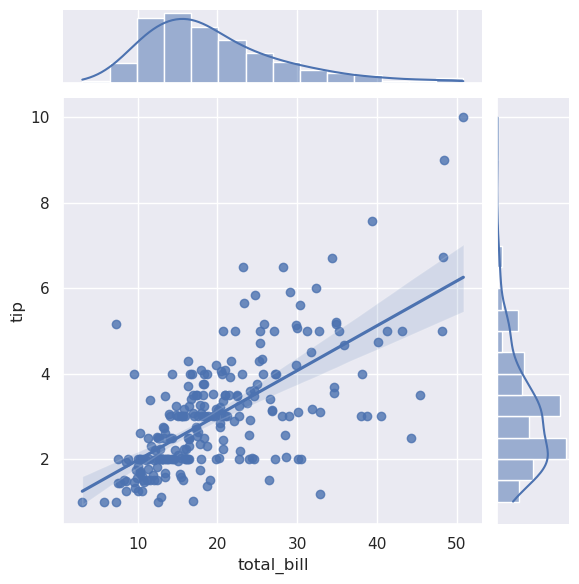

In [25]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

In [26]:
# Bar Plots 
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


/home/x057/anaconda31/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


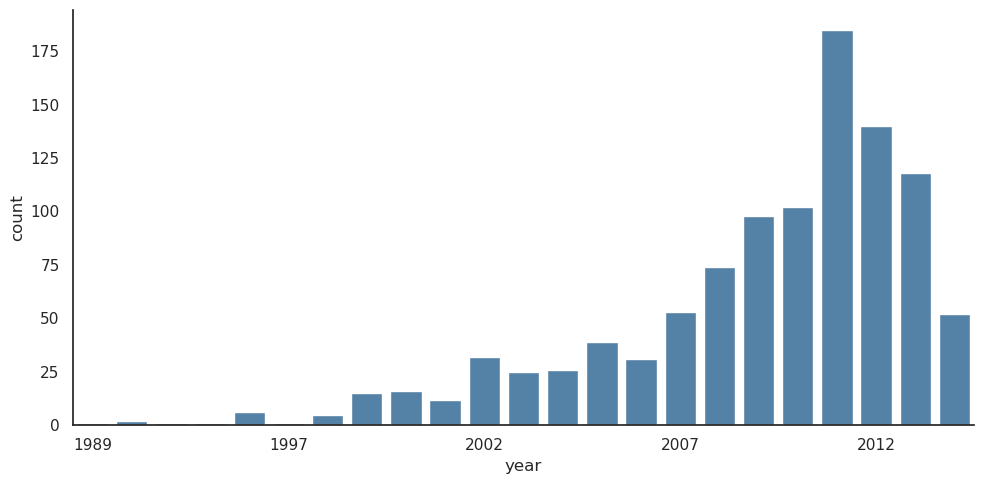

In [27]:
with sns.axes_style("white"):
    g = sns.catplot(x="year",data=planets, aspect=2, 
                    kind="count",color="steelblue")
    g.set_xticklabels(step=5)

/home/x057/anaconda31/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


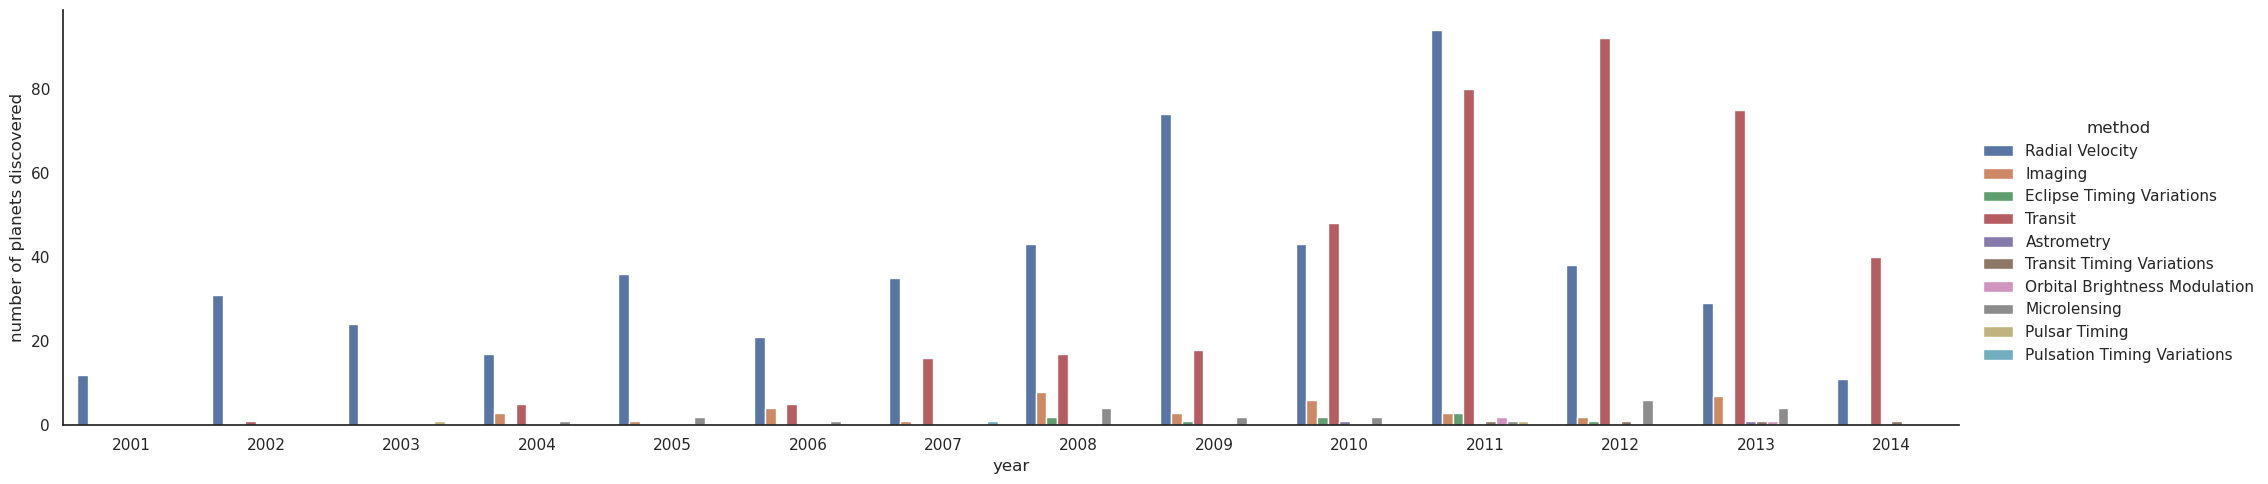

In [29]:
with sns.axes_style("white"):
    g = sns.catplot(x="year", data=planets, aspect=4.0, kind="count",
                    hue="method", order=range(2001, 2015))
    g.set_ylabels("number of planets discovered")